# 1. Fragestellungen und Datenbeschaffung
## 1.1 Titel: 
- Frauen haben das gleiche Recht auf Wiederheirat wie Männer.
## 1.2 Fragestellung:
- In welchen Staaten bestanden im Zeitraum 1990-2023 noch Einschränkungen für Frauen bei der Wiederheirat?
- Wann wurde in der Schweiz die vollständige Gleichstellung beim Recht auf Wiederheirat eingeführt? Und was hat sich dadurch verändert?
## 1.3 Datenquellen
- https://ourworldindata.org/
## 1.4 Daten beschaffen und laden

In [5]:
%pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 39.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


In [14]:
!pip install pandas

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ------------------------------ --------- 8.4/11.0 MB 43.4 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 35.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   --------------------------- ------------ 8.9/12.8 MB 44.2 MB/s eta 0:00:01
   ---------------------------------------- 12.8/12.8 MB 36.8 MB/s eta 0:00:00

   ---------------------------------------- 0/4 [pytz]
   ---------------------------------------- 0/4 [pytz]
   ---------- ----------------------------- 1/4 [tzdata]
   ---------- ----------------------------- 1/4 [tzdata]
   -------------------- ------------------- 2/4 [numpy]
   -------------------- ------------------- 2/4 [numpy]
   -------------------- ------------------- 2/4 [numpy]
   -------------------- ------------------- 2/4 [numpy]
   -------------------- ------------------- 2/4 [numpy]
   -------------------- -----------------

In [29]:
pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----------------------- ---------------- 4.7/8.1 MB 26.7 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 24.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 25.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   -------------------------------------- - 6.8/7.0 MB 39.4 MB/s eta 0:00:01
   ---------------------------------------- 7.0/7.0 MB 30.5 MB/s eta 0:00:00

   ---------------------------------------- 0/7 [pyparsing]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----------------- ---------------------- 3/7 [fonttools]
   ----------------- ---------------------- 3/7 [fonttools]
   ----------------- ---------------------- 3/7 [fonttoo

In [30]:
# Daten geladen
import pandas as pd
import requests 

#CSV Daten von Our World in Data
url = "https://ourworldindata.org/grapher/women-have-the-same-rights-to-remarry-as-men.csv"
df = pd.read_csv(url)

# Metadaten anzeigen 
metadata_url = "https://ourworldindata.org/grapher/women-have-the-same-rights-to-remarry-as-men.metadata.json"
metadata = pd.read_json(metadata_url)

# Daten anzeigen 
print("===== CSV DATA =====")
print(df.head(200)) 

print("\n===== METADATA KEYS =====")
print(metadata.keys())

===== CSV DATA =====
          Entity Code  Year  Women have the same rights to remarry as men
0    Afghanistan  AFG  1970                                             0
1    Afghanistan  AFG  1971                                             0
2    Afghanistan  AFG  1972                                             0
3    Afghanistan  AFG  1973                                             0
4    Afghanistan  AFG  1974                                             0
..           ...  ...   ...                                           ...
195       Angola  AGO  2003                                             1
196       Angola  AGO  2004                                             1
197       Angola  AGO  2005                                             1
198       Angola  AGO  2006                                             1
199       Angola  AGO  2007                                             1

[200 rows x 4 columns]

===== METADATA KEYS =====
Index(['chart', 'columns', 'dateDownload

In [31]:
df = pd.read_csv(url, skiprows=1,
                 names=["Entity", "Code", "Year", "Women have the same rights to remarry as men"])
df.head()

,Entity,Code,Year,Women have the same rights to remarry as men
0,Afghanistan,AFG,1970,0
1,Afghanistan,AFG,1971,0
2,Afghanistan,AFG,1972,0
3,Afghanistan,AFG,1973,0
4,Afghanistan,AFG,1974,0


## 2. Daten vorbereiten
- Die Rohdaten sind bereits im Long Format
- Für die Analyse werden die Daten pivotiert: Die Spalten repräsentierten die verschiedenen Jahre in aufsteigender Reihenfolgen. Die Zeilen repräsentieren die jeweiligen Länder. 

In [32]:
df_pivot = df.pivot(index="Entity", columns= "Year", values= "Women have the same rights to remarry as men")
df_pivot.head()

Year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Angola,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Antigua and Barbuda,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


## Statistik der Roh-Daten (Analyse im Long-Format)
Über die einzelnen kann folgendes ausgesagt werden:
- Die Spalte Entity enthält 189 verschiedene Regionen
- Die Spalte Codes enthält 189 verschiedene Codes
- Es sind Daten zwischen 1970 und 2023 vorhanden.

In [33]:
df.dtypes

Entity                                          object
Code                                            object
Year                                             int64
Women have the same rights to remarry as men     int64
dtype: object

### 3.1 Analyse Gebiete

In [34]:
print("Anzahl verschiedene Entity: ", len(df["Entity"].unique()))

Anzahl verschiedene Entity:  189


In [35]:
df["Entity"].value_counts()

Entity
Afghanistan            54
Albania                54
Algeria                54
Angola                 54
Antigua and Barbuda    54
                       ..
Venezuela              54
Vietnam                54
Yemen                  54
Zambia                 54
Zimbabwe               54
Name: count, Length: 189, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Region'}, xlabel='Entity', ylabel='Anzahl Datenpunkte'>

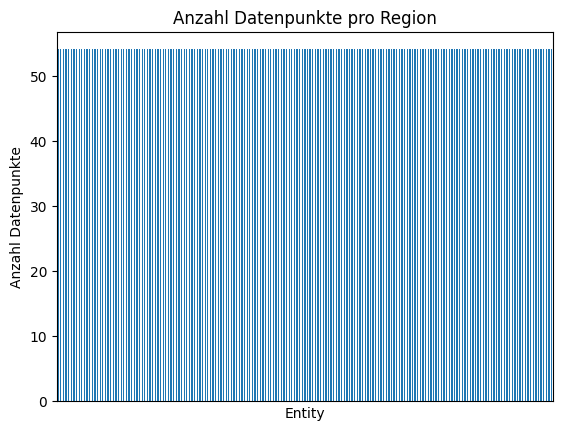

In [44]:
df['Entity'].value_counts().plot(kind='bar', 
                                 xticks=[],    
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Region')

### 3.2 Analyse Codes

In [45]:
print("Anzahl verschiedener Codes: ", len(df["Code"].unique()))

Anzahl verschiedener Codes:  189


In [46]:
df["Year"].value_counts().sort_index()

Year
1970    189
1971    189
1972    189
1973    189
1974    189
1975    189
1976    189
1977    189
1978    189
1979    189
1980    189
1981    189
1982    189
1983    189
1984    189
1985    189
1986    189
1987    189
1988    189
1989    189
1990    189
1991    189
1992    189
1993    189
1994    189
1995    189
1996    189
1997    189
1998    189
1999    189
2000    189
2001    189
2002    189
2003    189
2004    189
2005    189
2006    189
2007    189
2008    189
2009    189
2010    189
2011    189
2012    189
2013    189
2014    189
2015    189
2016    189
2017    189
2018    189
2019    189
2020    189
2021    189
2022    189
2023    189
Name: count, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkt pro Code'}, xlabel='Code', ylabel='Anzahl Datenpunkte'>

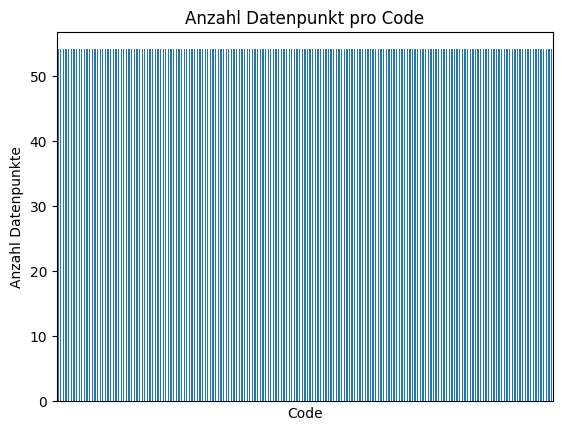

In [47]:
df["Code"].value_counts().plot(kind="bar",xticks=[], ylabel="Anzahl Datenpunkte", title="Anzahl Datenpunkt pro Code")

### 3.3 Analyse Jahr 

In [48]:
print("Anzahl verschiedener Jahre:", len(df["Year"].unique()))

Anzahl verschiedener Jahre: 54


In [50]:
df["Year"].value_counts ().sort_index()

Year
1970    189
1971    189
1972    189
1973    189
1974    189
1975    189
1976    189
1977    189
1978    189
1979    189
1980    189
1981    189
1982    189
1983    189
1984    189
1985    189
1986    189
1987    189
1988    189
1989    189
1990    189
1991    189
1992    189
1993    189
1994    189
1995    189
1996    189
1997    189
1998    189
1999    189
2000    189
2001    189
2002    189
2003    189
2004    189
2005    189
2006    189
2007    189
2008    189
2009    189
2010    189
2011    189
2012    189
2013    189
2014    189
2015    189
2016    189
2017    189
2018    189
2019    189
2020    189
2021    189
2022    189
2023    189
Name: count, dtype: int64

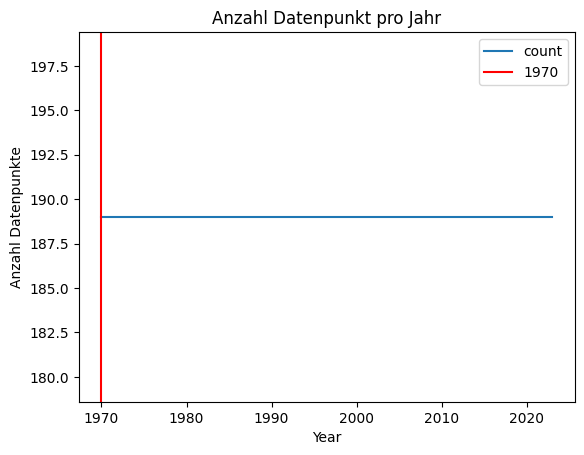

In [51]:
g = df ["Year"].value_counts().sort_index().plot (ylabel = "Anzahl Datenpunkte", title = "Anzahl Datenpunkt pro Jahr")
g.axvline(x=1970, color="red",label="1970")
g.legend()

### 3.4 Analyse Remarry

In [52]:
df.describe ()

,Year,Women have the same rights to remarry as men
count,10206.000000,10206.000000
mean,1996.500000,0.535959
std,15.586548,0.498730
min,1970.000000,0.000000
25%,1983.000000,0.000000
50%,1996.500000,1.000000
75%,2010.000000,1.000000
max,2023.000000,1.000000


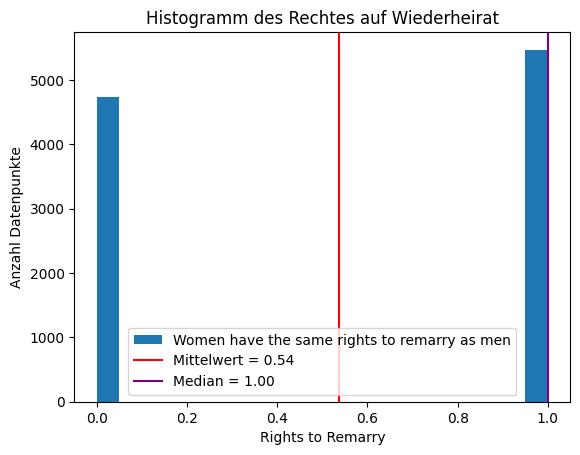

In [58]:
g = df["Women have the same rights to remarry as men"].plot(kind="hist", bins=20, title="Histogramm des Rechtes auf Wiederheirat", 
                           xlabel="Rights to Remarry", ylabel='Anzahl Datenpunkte')
mean = df["Women have the same rights to remarry as men"].mean()
g.axvline(x=df["Women have the same rights to remarry as men"].mean(), color='red',label=f'Mittelwert = {mean:.2f}')  

median = df["Women have the same rights to remarry as men"].median()
g.axvline(x=df["Women have the same rights to remarry as men"].median(), color='purple',label=  f'Median = {median:.2f}')  

g.legend()

In [ ]:
## Analyse
### Vorgehen
###Beobachtungen
